In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#import keras
import json

results = pd.read_csv('../results/result.csv')
results['loss']

0     0.10398297756910324,0.08300632238388062,0.0657...
1     0.0942663699388504,0.07142283022403717,0.05320...
2     0.09568656235933304,0.07515108585357666,0.0574...
3     0.09757434576749802,0.07494591176509857,0.0571...
4     0.10173433274030685,0.07716184854507446,0.0582...
                            ...                        
56    0.10188762843608856,0.08884034305810928,0.0761...
57    0.09957551956176758,0.08661122620105743,0.0741...
58    0.11191882938146591,0.10186735540628433,0.0921...
59    0.11220467835664749,0.10758138447999954,0.1031...
60    0.11363441497087479,0.10426554083824158,0.0960...
Name: loss, Length: 61, dtype: object

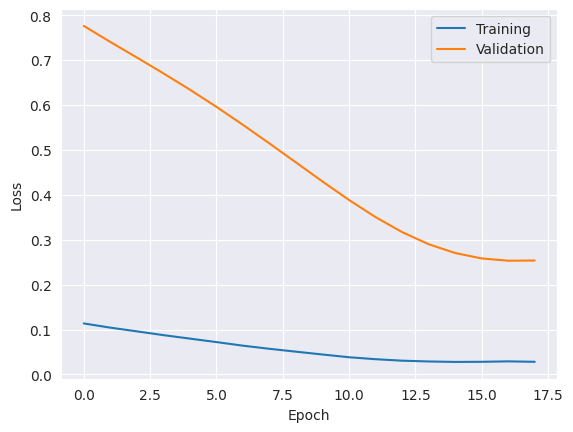

In [5]:
loss_history = [float(i) for i in results['loss'][60].split(",")]
val_loss_history = [float(i) for i in results['val_loss'][60].split(",")]

plt.plot(loss_history, label='Training')
plt.plot(val_loss_history, label='Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
model = keras.models.load_model('../saved_models/model_V0.48')

with open('../configs/config.json', 'r') as f:
	config = json.load(f)
	in_size = config['input_size']
	out_size = config['output_size']
	keep_only = config['keep_only']
	columns = config['columns']
	result_file = config['result_file']
	input_file = config['input_file']
	save_path = config['save_path']
	model_name = config['model']
	
	
# make a prediction
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], 16))
# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_Y, yhat))
print('Test RMSE: %.3f' % rmse)

normalized_test = preprocess_pipeline[:-2].transform(test)
test_price = normalized_test[:,0]
test_series = pd.Series(test_price, index=test_index)
plt.figure(figsize=(10, 4))
test['Preco_unitario'].plot(label="actual_norm")
rmses_list = []

for i in range(keep_only_size):
	pred = yhat[:,i]#, index=test_index[jump:len(yhat)+jump])
	print(len(pred))
	jump = in_size + i -1
	reconstituted_set = pd.DataFrame(
		{"Preco_unitario": pred, "2": list(len(pred)*[0])}, index=test_index[jump:len(yhat)+jump])
	
	rmses_list.append(np.sqrt(mean_squared_error(test_series[jump:len(pred)+jump], pred)))
	de_normalized = pd.Series(preprocess_pipeline[1].inverse_transform(reconstituted_set)[:,0], index=test_index[jump:len(yhat)+jump])
	de_normalized.plot()


plt.show()